In [35]:
import pylab as pl
import numpy as np
import astropy.io.fits as fits

from   desitarget.sv1.sv1_targetmask import desi_mask, bgs_mask, mws_mask, scnd_mask
from   astropy.table import Table, vstack, join
from   astropy.coordinates import SkyCoord
from   astropy import units as u

In [2]:
tile=80869

In [31]:
main_catalog=None
hp_catalog=None

for petal in range(10):
    fpath='/global/cscratch1/sd/mjwilson/DESILBGSPEC/{}/cumulative/20210408/v1.1/zbest-{}-{}-thru20210408.fits'.format(tile, petal, tile)
    
    print(fpath)
    
    zbest       = Table.read(fpath, 'ZBEST')
    fmap        = Table.read(fpath, 'FIBERMAP')
    
    fmap        = join(fmap, zbest, join_type='left', keys='TARGETID')
    
    is_hd_main  = (fmap['SV1_SCND_TARGET'] & scnd_mask['HETDEX_MAIN']) != 0
    is_hd_hp    = (fmap['SV1_SCND_TARGET'] & scnd_mask['HETDEX_HP'])   != 0
    
    print(np.count_nonzero(is_hd_main), np.count_nonzero(is_hd_hp), np.count_nonzero(is_hd_main & is_hd_hp))
    
    is_hd       = is_hd_main | is_hd_hp
    
    cols        = ['TARGET_RA', 'TARGET_DEC', 'TARGETID']
    cols        = fmap.dtype.names
    
    if main_catalog is None:
        main_catalog = fmap[cols][is_hd_main]
        hp_catalog = fmap[cols][is_hd_hp]
    
    else:
        main_catalog = vstack((main_catalog, fmap[cols][is_hd_main]))
        hp_catalog = vstack((hp_catalog, fmap[cols][is_hd_hp]))

/global/cscratch1/sd/mjwilson/DESILBGSPEC/80869/cumulative/20210408/v1.1/zbest-0-80869-thru20210408.fits
180 0 0
/global/cscratch1/sd/mjwilson/DESILBGSPEC/80869/cumulative/20210408/v1.1/zbest-1-80869-thru20210408.fits
239 0 0
/global/cscratch1/sd/mjwilson/DESILBGSPEC/80869/cumulative/20210408/v1.1/zbest-2-80869-thru20210408.fits
265 2 0
/global/cscratch1/sd/mjwilson/DESILBGSPEC/80869/cumulative/20210408/v1.1/zbest-3-80869-thru20210408.fits
233 1 0
/global/cscratch1/sd/mjwilson/DESILBGSPEC/80869/cumulative/20210408/v1.1/zbest-4-80869-thru20210408.fits
110 1 0
/global/cscratch1/sd/mjwilson/DESILBGSPEC/80869/cumulative/20210408/v1.1/zbest-5-80869-thru20210408.fits
52 0 0
/global/cscratch1/sd/mjwilson/DESILBGSPEC/80869/cumulative/20210408/v1.1/zbest-6-80869-thru20210408.fits
145 2 0
/global/cscratch1/sd/mjwilson/DESILBGSPEC/80869/cumulative/20210408/v1.1/zbest-7-80869-thru20210408.fits
261 10 0
/global/cscratch1/sd/mjwilson/DESILBGSPEC/80869/cumulative/20210408/v1.1/zbest-8-80869-thru20210

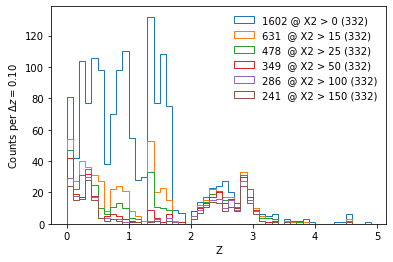

In [62]:
dz = 0.1

for dX2 in [0., 15., 25., 50., 100., 150.]:
    stuck = main_catalog['FIBERSTATUS'] > 0
    
    isin = (main_catalog['DELTACHI2'] >= dX2) & (~stuck)
    
    pl.hist(main_catalog['Z'][isin], bins=np.arange(0.0, 5.0, dz), histtype='step', label='{} @ X2 > {:.0f} ({:d})'.format(str(np.count_nonzero(isin)).ljust(4), dX2, np.count_nonzero(stuck)))
    
pl.xlabel('Z')
pl.ylabel('Counts per $\Delta z = {:.2f}$'.format(dz))
    
pl.legend(loc=1, frameon=False)

In [57]:
main_catalog['FIBERSTATUS', 'Z', 'DELTACHI2']

FIBERSTATUS,Z,DELTACHI2
int32,float64,float64
0,1.3269837977786638,18.128526866436005
0,0.2755500707165172,27.63019999116659
0,0.2948354871963281,5.954623552039266
0,1.63577689275841,135.1645165681839
0,0.3747576442211584,10.721263945102692
0,2.4691501505899645,32.386484215036035
0,0.8928679329705963,0.2127169966697693
0,0.25588957536756907,23.702376851812005
0,1.5181136557796526,38.89408361911774


In [4]:
len(main_catalog), len(hp_catalog)

(1934, 25)

In [5]:
main_catalog.sort('TARGET_RA')
hp_catalog.sort('TARGET_RA')

In [6]:
main_catalog

TARGET_RA,TARGET_DEC,TARGETID
float64,float64,int64
163.48052978515625,51.5822868347168,103628861865997
163.49014282226562,51.52200698852539,103628861865993
163.52671813964844,51.60617446899414,103628861865985
163.5386199951172,51.53516387939453,103628861865987
163.54054260253906,51.58338928222656,103628861865995
163.54063415527344,51.234657287597656,103625078603776
163.54461669921875,51.886898040771484,103636369670144
163.54647827148438,51.81934356689453,103632628350978
163.54721069335938,51.49379348754883,103628861865994


In [7]:
hd_main = Table.read('/project/projectdirs/desi/target/secondary/sv1/indata/HETDEX_MAIN.fits')
hd_hp   = Table.read('/project/projectdirs/desi/target/secondary/sv1/indata/HETDEX_HP.fits')

In [8]:
len(hd_main), len(hd_hp)

(17882, 378)

In [9]:
hd_main.sort('RA')
hd_hp.sort('RA')

In [10]:
hd_main

RA,DEC,PMRA,PMDEC,REF_EPOCH,OVERRIDE,detectid
float64,float64,float32,float32,float32,bool,int64
163.46652221679688,51.54117202758789,0.0,0.0,0.0,True,2100671502
163.47427368164062,51.60860824584961,0.0,0.0,0.0,True,2100671268
163.48052978515625,51.5822868347168,0.0,0.0,0.0,True,2100787266
163.49014282226562,51.52200698852539,0.0,0.0,0.0,True,2100671225
163.50437927246094,51.40061950683594,0.0,0.0,0.0,True,2100670955
163.5140380859375,51.57563781738281,0.0,0.0,0.0,True,2100671457
163.5194854736328,51.457855224609375,0.0,0.0,0.0,True,2100671036
163.5262908935547,51.61130142211914,0.0,0.0,0.0,True,2100671253
163.52671813964844,51.60617446899414,0.0,0.0,0.0,True,2100671249


In [11]:
len(np.unique(hd_main['detectid'].data)), len(hd_main)

(17882, 17882)

In [12]:
len(np.unique(hd_hp['detectid'].data)), len(hd_hp)

(335, 378)

In [13]:
c  = SkyCoord(ra=hd_main['RA']*u.degree, dec=hd_main['DEC']*u.degree)
c2 = SkyCoord(ra=main_catalog['TARGET_RA'].data*u.degree, dec=main_catalog['TARGET_DEC'].data*u.degree)

idx, d2d, d3d = c2.match_to_catalog_sky(c)

In [14]:
d2d.arcsec.max()

0.0

In [15]:
main_assigned = hd_main[idx]

In [16]:
main_assigned

RA,DEC,PMRA,PMDEC,REF_EPOCH,OVERRIDE,detectid
float64,float64,float32,float32,float32,bool,int64
163.48052978515625,51.5822868347168,0.0,0.0,0.0,True,2100787266
163.49014282226562,51.52200698852539,0.0,0.0,0.0,True,2100671225
163.52671813964844,51.60617446899414,0.0,0.0,0.0,True,2100671249
163.5386199951172,51.53516387939453,0.0,0.0,0.0,True,2100787438
163.54054260253906,51.58338928222656,0.0,0.0,0.0,True,2100787334
163.54063415527344,51.234657287597656,0.0,0.0,0.0,True,2100125381
163.54461669921875,51.886898040771484,0.0,0.0,0.0,True,2101645498
163.54647827148438,51.81934356689453,0.0,0.0,0.0,True,2101646087
163.54721069335938,51.49379348754883,0.0,0.0,0.0,True,2100671511


In [17]:
c  = SkyCoord(ra=hd_hp['RA']*u.degree, dec=hd_hp['DEC']*u.degree)
c2 = SkyCoord(ra=hp_catalog['TARGET_RA'].data*u.degree, dec=hp_catalog['TARGET_DEC'].data*u.degree)

idx, d2d, d3d = c2.match_to_catalog_sky(c)

In [18]:
d2d.arcsec.max()

0.0

In [19]:
hp_assigned = hd_hp[idx]

In [20]:
hp_assigned.pprint(max_lines=-1)

        RA                DEC         PMRA PMDEC REF_EPOCH OVERRIDE  detectid 
------------------ ------------------ ---- ----- --------- -------- ----------
164.45425415039062   52.1292724609375  0.0   0.0       0.0     True 2101778934
   165.06494140625 51.210914611816406  0.0   0.0       0.0     True 2101778934
     165.107421875  51.16847229003906  0.0   0.0       0.0     True 2101778934
165.26083374023438  52.16966247558594  0.0   0.0       0.0     True 2101778934
166.25062561035156   51.8939323425293  0.0   0.0       0.0     True 2101778934
     166.439453125 51.053070068359375  0.0   0.0       0.0     True 2101778934
166.50823974609375  50.75823211669922  0.0   0.0       0.0     True 2101778934
166.53121948242188 51.063961029052734  0.0   0.0       0.0     True 2101778934
 166.6493682861328  50.47038650512695  0.0   0.0       0.0     True 2101778934
166.96527099609375 50.479835510253906  0.0   0.0       0.0     True 2101778934
166.97946166992188 51.956207275390625  0.0   0.0    

In [21]:
hp_assigned.write('hetdex_hp_assigned_80869.fits', format='fits', overwrite=True)

In [22]:
len(hp_assigned)

25

In [23]:
for_karl = vstack((main_assigned, hp_assigned))

In [24]:
for_karl

RA,DEC,PMRA,PMDEC,REF_EPOCH,OVERRIDE,detectid
float64,float64,float32,float32,float32,bool,int64
163.48052978515625,51.5822868347168,0.0,0.0,0.0,True,2100787266
163.49014282226562,51.52200698852539,0.0,0.0,0.0,True,2100671225
163.52671813964844,51.60617446899414,0.0,0.0,0.0,True,2100671249
163.5386199951172,51.53516387939453,0.0,0.0,0.0,True,2100787438
163.54054260253906,51.58338928222656,0.0,0.0,0.0,True,2100787334
163.54063415527344,51.234657287597656,0.0,0.0,0.0,True,2100125381
163.54461669921875,51.886898040771484,0.0,0.0,0.0,True,2101645498
163.54647827148438,51.81934356689453,0.0,0.0,0.0,True,2101646087
163.54721069335938,51.49379348754883,0.0,0.0,0.0,True,2100671511


In [28]:
for_karl.write('hetdex_assigned_80869.fits', format='fits', overwrite=True)

In [218]:
dat = fits.open('/project/projectdirs/desi/target/secondary/sv1/indata/HETDEX_HP.fits')[1].data

In [219]:
uids, cnts = np.unique(dat['detectid'], return_counts=True)

In [220]:
for uid, cnt in zip(uids, cnts):
    if cnt > 1:
        print('{}\t{}'.format(uid, cnt))

2100777760	19
2101778934	26


# Done.